# Visualization of City Revenue Data

## Overview

After completing the data cleaning and exploratory analysis, the next step is to visualize the data to better understand revenue patterns and performance.

Visualizations convert numerical data into graphical representations, making it easier to identify trends, comparisons, and insights across cities, revenue types, and fiscal years.

In this section, different types of charts are used to analyze:

- Top and least performing cities based on actual revenue
- Comparison between budget and actual revenue
- Revenue trends across fiscal years
- Contribution of different revenue types
- Budget utilization efficiency and revenue gaps

These charts provide a clear and meaningful understanding of how city revenue behaves and help in drawing accurate conclusions from the data.


### Question 1:
Which cities contribute the most to the overall actual revenue?
### Question 2:
What is the trend of actual revenue across different fiscal years?
### Question 3:
Does the actual revenue meet or exceed the planned budget across fiscal years?
### Question 4:
Which revenue sources contribute the highest share of total revenue?
### Question 5:
What is the distribution pattern of actual revenue across cities?
### Question 6:
Which cities show significant differences between budgeted and actual revenue?
### Question 7:
Which revenue types are the strongest income sources?
### Question 8:
How does revenue contribution from different sources vary across fiscal years?
### Question 9:
Are cities utilizing their allocated budget efficiently?
### Question 10:
Which cities show revenue surplus and which face revenue shortfalls?


## Top 10 Cities by Actual Revenue

This bar chart displays the top 10 cities generating the highest actual revenue.


city_name
DES MOINES         1.242002e+10
CEDAR RAPIDS       1.175398e+10
AMES               7.094476e+09
SIOUX CITY         5.050431e+09
DAVENPORT          4.921929e+09
WEST DES MOINES    4.282221e+09
IOWA CITY          4.121095e+09
DUBUQUE            3.618492e+09
WATERLOO           3.138713e+09
CORALVILLE         3.133721e+09
Name: actual, dtype: float64


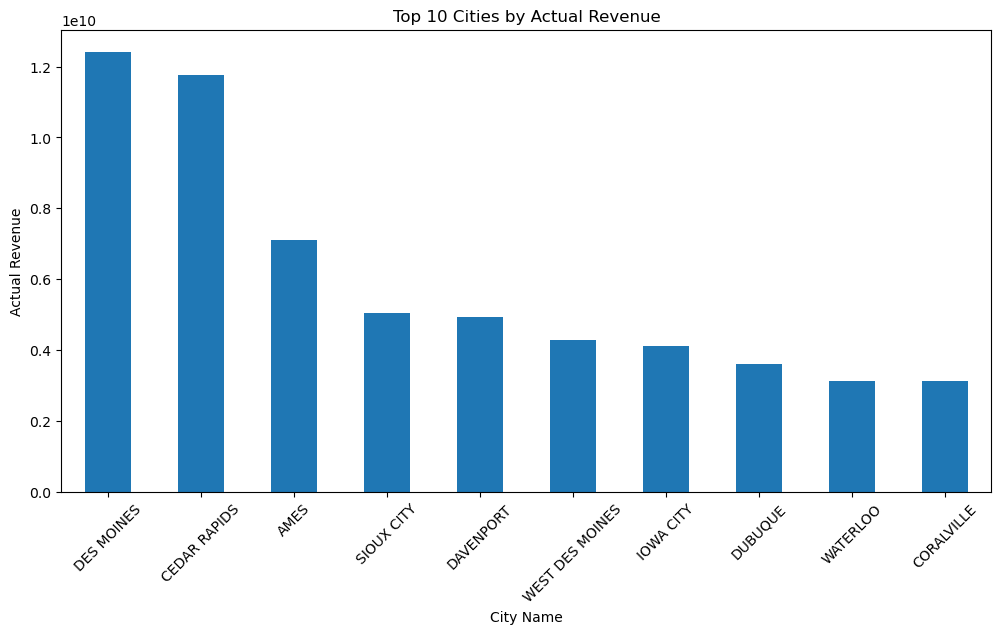

In [23]:
import matplotlib.pyplot as plt

top_10_cities = (
    df.groupby('city_name')['actual']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

print(top_10_cities)

plt.figure(figsize=(12,6))
top_10_cities.plot(kind='bar')
plt.title('Top 10 Cities by Actual Revenue')
plt.xlabel('City Name')
plt.ylabel('Actual Revenue')
plt.xticks(rotation=45)
plt.show()


### Finding
The bar chart clearly shows that a small number of cities contribute a significantly higher share of the total actual revenue.
These top-performing cities act as the primary revenue generators and have a strong financial contribution compared to other cities. The difference in revenue levels between the top cities and the rest is noticeably large.
This insight helps identify the key cities that drive overall revenue performance and can be considered as financially strong regions.


## Fiscal Year-wise Actual Revenue Trend

This line chart shows how the actual revenue has changed across different fiscal years.


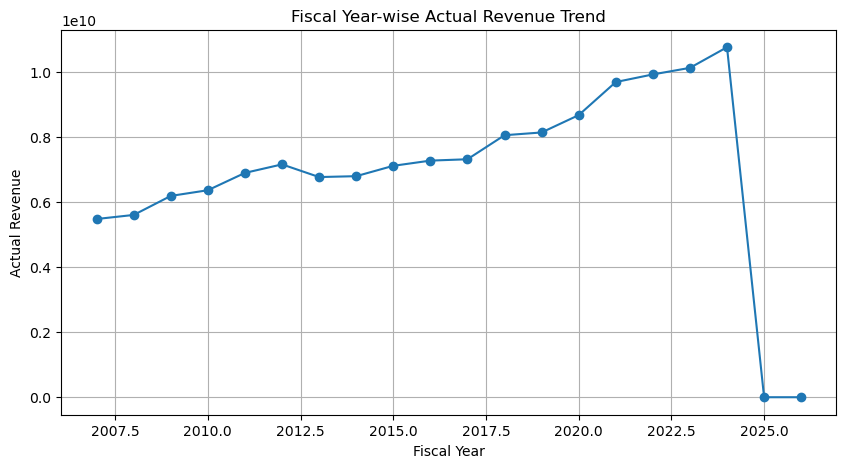

In [24]:
year_actual = df.groupby('fiscal_year')['actual'].sum()

plt.figure(figsize=(10,5))
plt.plot(year_actual.index, year_actual.values, marker='o')
plt.title('Fiscal Year-wise Actual Revenue Trend')
plt.xlabel('Fiscal Year')
plt.ylabel('Actual Revenue')
plt.grid(True)
plt.show()


### Finding
The chart shows variations in revenue across years, indicating periods of increase and decrease in financial performance.


## Budget vs Actual Revenue by Fiscal Year

This chart compares planned budget and actual revenue year by year.


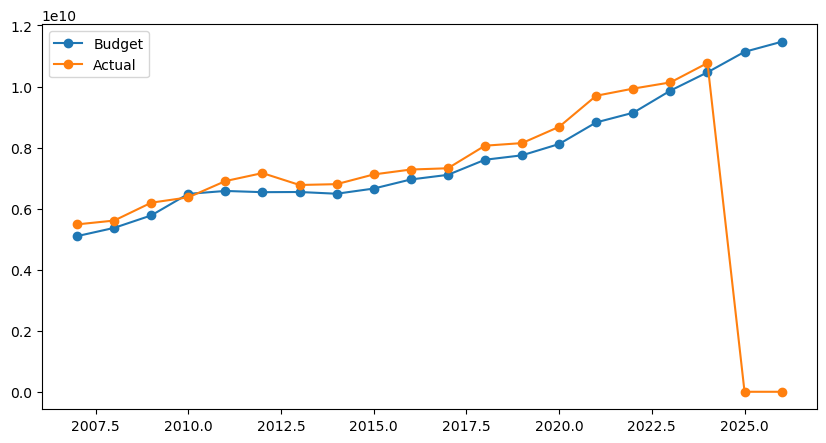

In [25]:
year_data = df.groupby('fiscal_year')[['budget', 'actual']].sum()

plt.figure(figsize=(10,5))
plt.plot(year_data.index, year_data['budget'], marker='o', label='Budget')
plt.plot(year_data.index, year_data['actual'], marker='o', label='Actual')
plt.legend()
plt.show()


### Finding
Some years show actual revenue exceeding the budget, while other years fall short of expectations.


## Revenue Distribution by Revenue Type
This pie chart shows the contribution of major revenue sources.


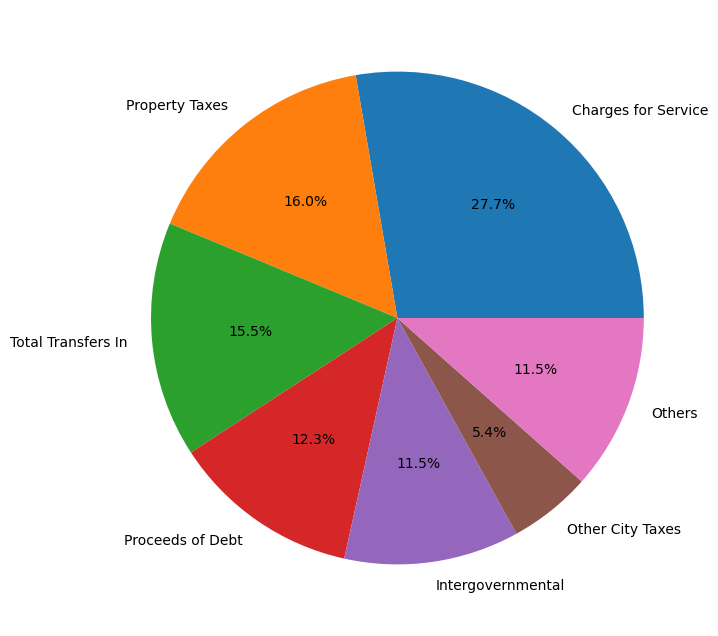

In [26]:
rev = df.groupby('revenue_type')['actual'].sum().sort_values(ascending=False)
top6 = rev.head(6)
others = rev.iloc[6:].sum()
top6['Others'] = others

plt.figure(figsize=(8,8))
plt.pie(top6, labels=top6.index, autopct='%1.1f%%')
plt.show()


### Finding
Few revenue types dominate the total income, indicating major revenue sources.


In [ ]:
## Distribution of Actual Revenue
This histogram shows how actual revenue values are distributed.


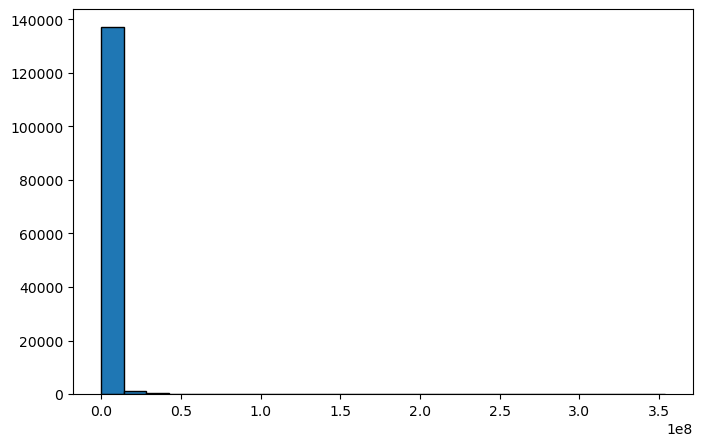

In [27]:
plt.figure(figsize=(8,5))
plt.hist(df['actual'], bins=25, edgecolor='black')
plt.show()


### Finding
Most revenue values fall within a specific range, showing a consistent revenue pattern.


## Top 15 Cities – Budget vs Actual Revenue
To make the visualization clear and readable, only the top 15 cities based on actual revenue are displayed.


<Figure size 1200x600 with 0 Axes>

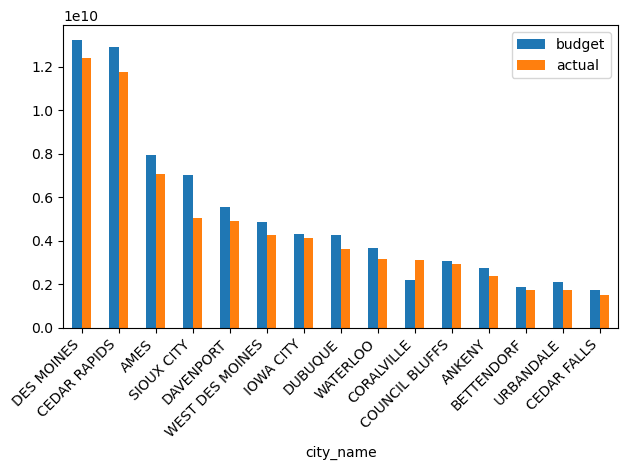

In [32]:
top15 = (
    df.groupby('city_name')[['budget','actual']]
      .sum()
      .sort_values(by='actual', ascending=False)
      .head(15)
)

plt.figure(figsize=(12,6))
top15.plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Finding
Displaying only the top 15 cities makes the comparison between budget and actual revenue clear and readable. 
These cities are the major contributors to total revenue.


## Revenue Type-wise Actual Revenue


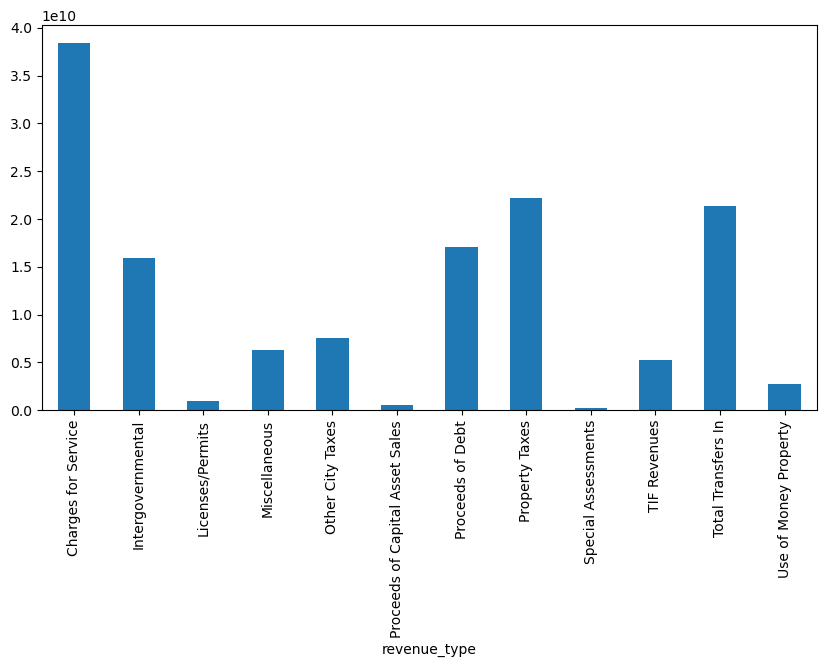

In [33]:
df.groupby('revenue_type')['actual'].sum().plot(kind='bar', figsize=(10,5))
plt.show()


### Finding
Certain revenue types generate significantly higher income than others.


In [35]:
## Budget Utilization Percentage


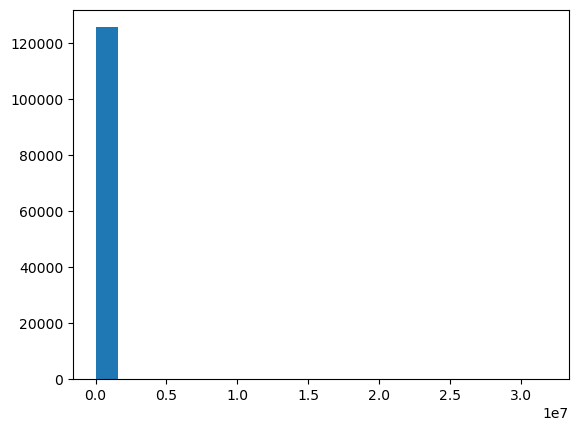

In [36]:
df['utilization_percentage'] = (df['actual'] / df['budget']) * 100
plt.hist(df['utilization_percentage'], bins=20)
plt.show()


### Finding
Many records show efficient utilization, while some exceed 100% indicating overspending.


## Top 15 Cities – Revenue Gap Analysis

This chart shows the revenue gap (Actual – Budget) for the top 15 cities based on actual revenue.


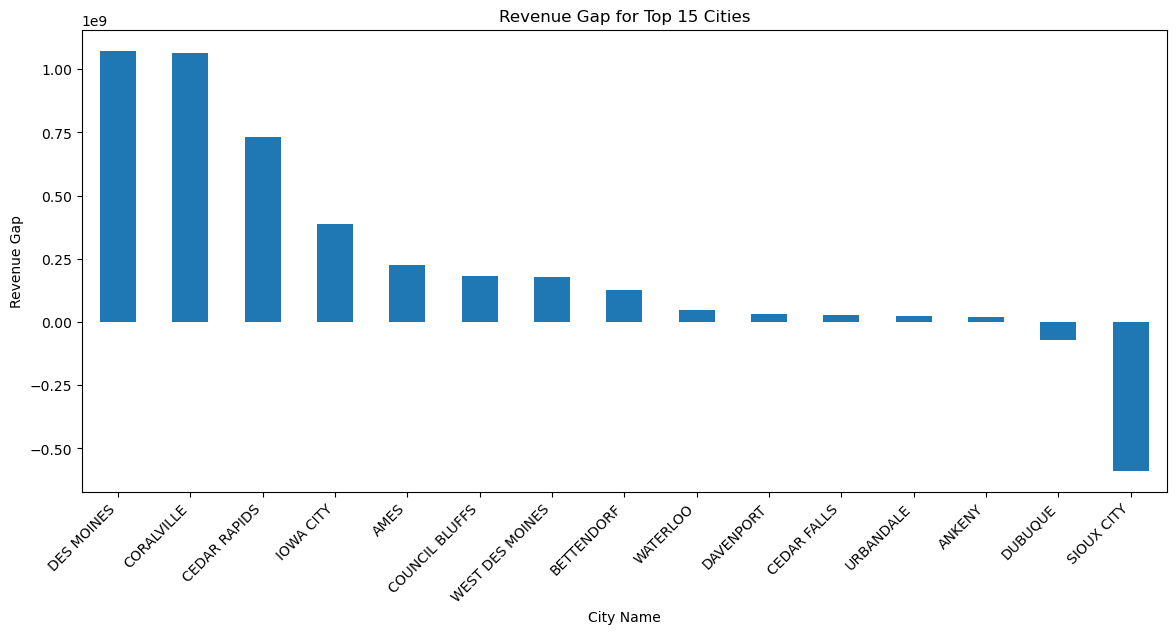

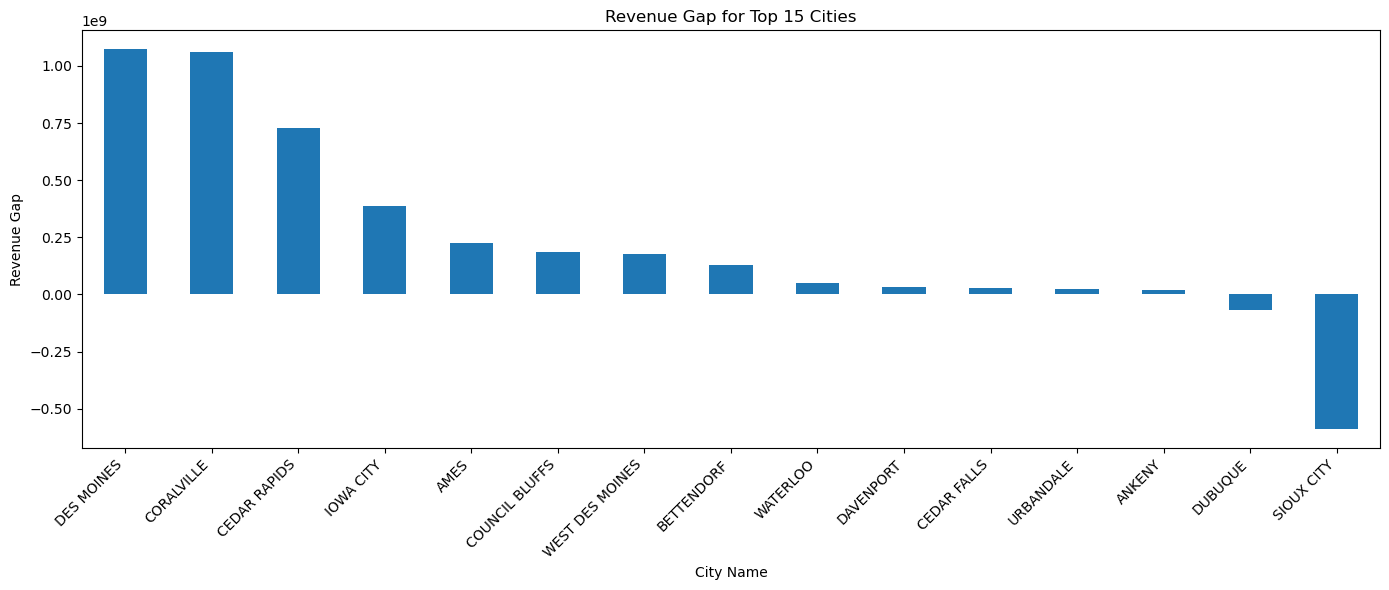

In [40]:
# Create revenue gap
df['revenue_gap'] = df['actual'] - df['budget']

# Get top 15 cities based on actual revenue
top15_cities = (
    df.groupby('city_name')['actual']
      .sum()
      .sort_values(ascending=False)
      .head(15)
      .index
)

# Filter only those cities
gap_top15 = (
    df[df['city_name'].isin(top15_cities)]
      .groupby('city_name')['revenue_gap']
      .sum()
      .sort_values(ascending=False)
)

# Plot
plt.figure(figsize=(14,6))
gap_top15.plot(kind='bar')
plt.title('Revenue Gap for Top 15 Cities')
plt.xlabel('City Name')
plt.ylabel('Revenue Gap')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Finding
By focusing on the top 15 cities, the chart clearly shows the comparison between budgeted and actual revenue. 
These cities are the major contributors and their performance is easy to interpret in this visualization.


# Conclusion

This project performed an in-depth Exploratory Data Analysis on city revenue and budget data to understand financial performance across cities, revenue types, and fiscal years.

Through data cleaning, transformation, and visualization, several meaningful insights were derived from the dataset.

The analysis revealed that only a small number of cities contribute a major portion of the total revenue. It was also observed that actual revenue does not always align with the planned budget, indicating gaps in financial forecasting and budget utilization.

Revenue distribution analysis showed that a few revenue types dominate the income sources, highlighting the primary streams on which cities depend. Fiscal year trend analysis helped in understanding the growth and decline patterns of revenue over time.

The revenue gap and utilization analysis further identified cities with surplus performance as well as cities facing revenue shortfalls.

Overall, this project demonstrates how Exploratory Data Analysis and visualization techniques can be effectively used to uncover patterns, identify financial strengths and weaknesses, and support better decision-making in city revenue management.


# Problem Statement and Solution

## Problem Statement

City administrations allocate budgets every fiscal year with the expectation that actual revenue will meet the planned targets. However, due to various operational and economic factors, actual revenue often differs from the allocated budget.

The challenge is to identify:

- Which cities are performing well and which are underperforming
- Whether the actual revenue meets the planned budget
- Which revenue sources contribute the most to city income
- How revenue trends change across fiscal years
- Whether cities are efficiently utilizing their allocated budgets

Without proper analysis, it is difficult to understand these financial patterns and make informed decisions.

## Solution

To address this problem, Exploratory Data Analysis (EDA) techniques were applied using Python.

The dataset was cleaned, transformed, and analyzed using statistical methods and visualizations. Bar charts, line charts, pie charts, histograms, and pivot tables were used to identify patterns and trends.

Through this analysis:

- Top and least performing cities were identified
- Budget vs actual comparisons were made across years and cities
- Major revenue sources were determined
- Budget utilization efficiency and revenue gaps were analyzed

This solution demonstrates how data analysis can be used to derive meaningful financial insights and support better planning and decision-making in city revenue management.
